In [1]:
#!pip install pandas_bokeh

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas_bokeh

from datetime import timedelta, date

In [3]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [4]:
h =  !hostname
#h = 'test'

if h[0] == 'cio-Aspire-VN7-593G':
    folder = '../covid19-opendata-vaccini/'
    df_anagrafica = pd.read_csv(folder +'dati/anagrafica-vaccini-summary-latest.csv')  # si aggiorna
    #df_consegne = pd.read_csv(folder +'dati/consegne-vaccini-latest.csv') # si aggiorna
    df_platea = pd.read_csv(folder +'dati/platea.csv')
    df_platea_booster = pd.read_csv(folder +'dati/platea-dose-addizionale-booster.csv')
    #df_punti_som_latest = pd.read_csv(folder +'dati/punti-somministrazione-latest.csv')
    #df_punti_som_tipologia = pd.read_csv(folder +'dati/punti-somministrazione-tipologia.csv')
    #df_guariti = pd.read_csv(folder +'dati/soggetti-guariti.csv')  # si aggiorna
    df_somministrazione = pd.read_csv(folder +'dati/somministrazioni-vaccini-latest.csv', parse_dates = ['data_somministrazione'])  # si aggiorna
    df_somministrazione_summary = pd.read_csv(folder +'dati/somministrazioni-vaccini-summary-latest.csv', parse_dates = ['data_somministrazione'])  # si aggiorna
    #df_vaccini = pd.read_csv(folder +'dati/vaccini-summary-latest.csv')   # si aggiorna
    print("Fine caricamento dataframe da dataset clonati in locale")
else:
    print("Inizio download dataset da github\n...")    
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/anagrafica-vaccini-summary-latest.csv"
    df_anagrafica = pd.read_csv(url) #, parse_dates = ['ultimo_aggiornamento']
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv"
    df_platea = pd.read_csv(url)
    url="https://github.com/italia/covid19-opendata-vaccini/raw/master/dati/platea-dose-addizionale-booster.csv"
    df_platea_booster = pd.read_csv(url)
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv"
    df_somministrazione = pd.read_csv(url, parse_dates = ['data_somministrazione'])
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv"
    df_somministrazione_summary = pd.read_csv(url, parse_dates = ['data_somministrazione'])
    print("Fine download")
    

Fine caricamento dataframe da dataset clonati in locale


In [5]:
!ls

analisi_esplorativa_COVID.ipynb      README.md
analisi_esplorativa_vaccini.ipynb    somministrazione_vaccini.ipynb
analisi_platea_vs_popolazione.ipynb  Untitled.ipynb


# Elenco dataset

## Anagrafica df_anagrafica

In [6]:
df_anagrafica

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
0,05-11,761776,393036,368740,673094,87551,1131,0,2022-01-12
1,12-19,7503867,3855656,3648211,3690050,3324469,121409,367939,2022-01-12
2,20-29,12066077,6239764,5826313,5302614,4936021,212107,1615335,2022-01-12
3,30-39,13151206,6685138,6466068,5703396,5300887,212414,1934509,2022-01-12
4,40-49,17594931,8691365,8903566,7261348,6797652,288699,3247232,2022-01-12
5,50-59,21153188,10363650,10789538,8280573,7655415,341314,4875886,2022-01-12
6,60-69,17650230,8583678,9066552,6699621,6111423,232648,4606538,2022-01-12
7,70-79,15065829,7106569,7959260,5486508,5236968,158698,4183655,2022-01-12
8,80-89,9885868,4106633,5779235,3490318,3418918,76697,2899935,2022-01-12
9,90+,2186487,649856,1536631,806100,776577,19856,583954,2022-01-12


In [7]:
df_anagrafica.shape

(10, 9)

## Platea df_platea

In [8]:
df_platea

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
...,...,...,...,...
184,VEN,Veneto,40-49,715790
185,VEN,Veneto,50-59,806474
186,VEN,Veneto,60-69,610635
187,VEN,Veneto,70-79,494721


In [9]:
df_platea.groupby(['area', 'nome_area']).sum()

,,totale_popolazione
area,nome_area,
ABR,Abruzzo,1265353
BAS,Basilicata,523836
CAL,Calabria,1803821
CAM,Campania,5481138
EMR,Emilia-Romagna,4266930
FVG,Friuli-Venezia Giulia,1154702
LAZ,Lazio,5522780
LIG,Liguria,1479768
LOM,Lombardia,9883969


## Platea booster df_platea_booster

In [10]:
df_platea_booster

,area,nome_area,categoria_prevalente,totale_popolazione
0,ABR,Abruzzo,12-19,44530
1,ABR,Abruzzo,20-29,88586
2,ABR,Abruzzo,30-39,93927
3,ABR,Abruzzo,40-49,130875
4,ABR,Abruzzo,50-59,160438
...,...,...,...,...
163,VEN,Veneto,40-49,477827
164,VEN,Veneto,50-59,617744
165,VEN,Veneto,60-69,527158
166,VEN,Veneto,70-79,451220


## Somministrazione df_somministrazione  
Contiene le serie storiche del numero di somministrazioni giornaliere suddivise per regione italiana, fascia anagrafica, fornitore di vaccino.

In [11]:
df_somministrazione

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173099,2022-01-11,Pfizer/BioNTech,VEN,60-69,1237,1479,327,112,2,2275,ITH,ITH3,5,Veneto
173100,2022-01-11,Pfizer/BioNTech,VEN,70-79,850,1004,147,70,0,1637,ITH,ITH3,5,Veneto
173101,2022-01-11,Pfizer/BioNTech,VEN,80-89,287,425,85,26,0,601,ITH,ITH3,5,Veneto
173102,2022-01-11,Pfizer/BioNTech,VEN,90+,48,129,19,7,0,151,ITH,ITH3,5,Veneto


In [12]:
df_somministrazione.dtypes

data_somministrazione       datetime64[ns]
fornitore                           object
area                                object
fascia_anagrafica                   object
sesso_maschile                       int64
sesso_femminile                      int64
prima_dose                           int64
seconda_dose                         int64
pregressa_infezione                  int64
dose_addizionale_booster             int64
codice_NUTS1                        object
codice_NUTS2                        object
codice_regione_ISTAT                 int64
nome_area                           object
dtype: object

In [13]:
#check range date
df_somministrazione['data_somministrazione'].describe(datetime_is_numeric=True)

count                           173104
mean     2021-07-13 06:46:53.550235648
min                2020-12-27 00:00:00
25%                2021-04-30 00:00:00
50%                2021-07-10 00:00:00
75%                2021-09-27 00:00:00
max                2022-01-11 00:00:00
Name: data_somministrazione, dtype: object

In [14]:
# check granularità dati
np.sort(df_somministrazione['data_somministrazione'].unique())

array(['2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23

In [15]:
df_somministrazione[df_somministrazione['data_somministrazione'] == '2021-12-15']

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
162048,2021-12-15,Janssen,EMR,30-39,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
162049,2021-12-15,Janssen,EMR,40-49,1,1,2,0,0,0,ITH,ITH5,8,Emilia-Romagna
162050,2021-12-15,Janssen,EMR,50-59,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
162051,2021-12-15,Janssen,EMR,70-79,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
162052,2021-12-15,Janssen,FVG,60-69,1,0,1,0,0,0,ITH,ITH4,6,Friuli-Venezia Giulia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162443,2021-12-15,Pfizer/BioNTech,VEN,50-59,2137,2450,203,160,2,4222,ITH,ITH3,5,Veneto
162444,2021-12-15,Pfizer/BioNTech,VEN,60-69,2009,2390,102,103,2,4192,ITH,ITH3,5,Veneto
162445,2021-12-15,Pfizer/BioNTech,VEN,70-79,2450,2863,81,71,0,5161,ITH,ITH3,5,Veneto
162446,2021-12-15,Pfizer/BioNTech,VEN,80-89,970,1653,34,46,0,2543,ITH,ITH3,5,Veneto


In [16]:
len(df_somministrazione['fascia_anagrafica'].unique()) * len(df_somministrazione['area'].unique())

210

In [17]:
df_somministrazione['fornitore'].unique()

array(['Moderna', 'Pfizer/BioNTech', 'Janssen', 'Vaxzevria (AstraZeneca)',
       'Pfizer Pediatrico'], dtype=object)

### Verifico che la colonna 'area' vada bene per l'unione tra soministrazione e platea

In [18]:
set(df_somministrazione['area'].unique()) ^ set(df_platea['area'].unique())

set()

## Somministrazione sumary df_somministrazione_summary
Contiene le serie storiche del numero di somministrazioni giornaliere suddivise per regione italiana.

In [19]:
df_somministrazione_summary

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-04-11,CAM,17534,8613,8921,15076,2090,368,0,ITF,ITF3,15,Campania
1,2021-05-24,FVG,11543,5588,5955,7539,3676,328,0,ITH,ITH4,6,Friuli-Venezia Giulia
2,2021-06-04,BAS,4833,2289,2544,3745,1046,42,0,ITF,ITF5,17,Basilicata
3,2021-11-25,EMR,27756,12627,15129,1956,1178,72,24550,ITH,ITH5,8,Emilia-Romagna
4,2021-02-22,ABR,2642,1174,1468,2593,30,19,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2021-05-06,VEN,47099,22086,25013,36552,8524,2023,0,ITH,ITH3,5,Veneto
7902,2021-12-25,MOL,1,1,0,0,0,0,1,ITF,ITF2,14,Molise
7903,2021-01-07,LAZ,7984,3000,4984,7962,0,22,0,ITI,ITI4,12,Lazio
7904,2021-01-17,MAR,1628,697,931,1560,65,3,0,ITI,ITI3,11,Marche


In [20]:
df_somministrazione['data_somministrazione'].describe(datetime_is_numeric=True)

count                           173104
mean     2021-07-13 06:46:53.550235648
min                2020-12-27 00:00:00
25%                2021-04-30 00:00:00
50%                2021-07-10 00:00:00
75%                2021-09-27 00:00:00
max                2022-01-11 00:00:00
Name: data_somministrazione, dtype: object

In [21]:
np.sort(df_somministrazione_summary['data_somministrazione'].unique())

array(['2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23

In [22]:
#verifico la presenza di tutte le regioni:
df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-12-15'].sort_values('codice_regione_ISTAT')


,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
6946,2021-12-15,PIE,33770,15649,18121,2092,1515,31,30132,ITC,ITC1,1,Piemonte
3214,2021-12-15,VDA,1485,716,769,61,15,0,1409,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
4914,2021-12-15,LOM,102323,47876,54447,3479,2013,101,96730,ITC,ITC4,3,Lombardia
70,2021-12-15,PAB,2631,1283,1348,219,286,1,2125,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
7064,2021-12-15,PAT,3313,1438,1875,236,206,3,2868,ITH,ITH2,4,Provincia Autonoma Trento
6828,2021-12-15,VEN,55414,25814,29600,2715,1825,88,50786,ITH,ITH3,5,Veneto
6459,2021-12-15,FVG,11569,5601,5968,425,649,2,10493,ITH,ITH4,6,Friuli-Venezia Giulia
5444,2021-12-15,LIG,16295,7445,8850,1043,943,4,14305,ITC,ITC3,7,Liguria
4382,2021-12-15,EMR,39694,18060,21634,1708,893,63,37030,ITH,ITH5,8,Emilia-Romagna
6587,2021-12-15,TOS,37577,17150,20427,2152,1588,88,33749,ITI,ITI1,9,Toscana


In [23]:
np.sort(df_somministrazione_summary['codice_regione_ISTAT'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [24]:
# Verifico che la colonna 'area' vada bene per l'unione tra somministrazione_summary e platea
set(df_somministrazione_summary['area'].unique()) ^ set(df_platea['area'].unique())

set()

### Colonne differenti tra df_somministrazione e df_somministrazione_summary

In [25]:
set_somm = set(df_somministrazione.columns)

In [26]:
set_somm_summary = set(df_somministrazione_summary.columns)

In [27]:
#differenza simmetrica
set_somm ^ set_somm_summary

{'fascia_anagrafica', 'fornitore', 'totale'}

In [28]:
#Colonne presenti solo in df_somministrazione
set_somm - set_somm_summary

{'fascia_anagrafica', 'fornitore'}

In [29]:
#Colonne presenti solo in df_somministrazione_summary
set_somm_summary - set_somm

{'totale'}

# Analisi

## Andamento vaccini totale - prima, seconda, booster

In [30]:
df_somministrazione_summary.sort_values('data_somministrazione').head(5)

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
2380,2020-12-27,PIE,923,370,553,921,0,2,0,ITC,ITC1,1,Piemonte
3977,2020-12-27,CAL,318,170,148,318,0,0,0,ITF,ITF6,18,Calabria
6773,2020-12-27,PUG,510,252,258,510,0,0,0,ITF,ITF4,16,Puglia
2647,2020-12-27,UMB,92,51,41,92,0,0,0,ITI,ITI2,10,Umbria
257,2020-12-27,VDA,20,9,11,20,0,0,0,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste


In [31]:
#Raggruppo somministrazioDF per togliere la distinzione tra regioni 
df_somm_grouped = df_somministrazione_summary.groupby('data_somministrazione').sum()

In [32]:
df_somm_grouped

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2020-12-27,7346,3499,3847,7331,0,15,0,214
2020-12-28,1503,687,816,1501,0,2,0,85
2020-12-29,1119,491,628,1118,0,1,0,86
2020-12-30,4868,1958,2910,4866,0,2,0,105
2020-12-31,25930,10057,15873,25896,0,34,0,152
...,...,...,...,...,...,...,...,...
2022-01-07,680367,333753,346614,74432,56014,1674,548247,214
2022-01-08,632319,312579,319740,81763,52992,1486,496078,214
2022-01-09,414579,207465,207114,62222,36956,1104,314297,214


In [33]:
g = df_somm_grouped.plot_bokeh(y = [\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left", stacked=True, kind='bar')#, logy=True)

### Andamento storico somministrazione dosi con media settimanale

In [34]:
g = df_somm_grouped.resample(rule='W').mean().plot_bokeh(y = [\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="Somministrazione dosi con media settimanale", figsize=(950, 500),\
                               legend="top_left", stacked=True, kind='bar')#, logy=True)

In [35]:
g = df_somm_grouped.plot_bokeh(y = ['prima_dose','seconda_dose', 'dose_addizionale_booster',\
                                    'pregressa_infezione', 'totale',],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left")#, logy=True)

In [36]:
g = df_somm_grouped.resample(rule='W').mean().plot_bokeh(y = ['prima_dose','seconda_dose',\
                                        'dose_addizionale_booster', 'pregressa_infezione', 'totale'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),
                                                 legend="top_left")#, logy=True)

In [37]:
#Verifica significato 'totale' vaccini
df_check = df_somm_grouped.copy(deep = True)
df_check.loc[:, 'check_totale'] = df_check['prima_dose'] + df_check['seconda_dose'] + df_check['dose_addizionale_booster'] + df_check['pregressa_infezione']
df_check

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT,check_totale
data_somministrazione,,,,,,,,,
2020-12-27,7346,3499,3847,7331,0,15,0,214,7346
2020-12-28,1503,687,816,1501,0,2,0,85,1503
2020-12-29,1119,491,628,1118,0,1,0,86,1119
2020-12-30,4868,1958,2910,4866,0,2,0,105,4868
2020-12-31,25930,10057,15873,25896,0,34,0,152,25930
...,...,...,...,...,...,...,...,...,...
2022-01-07,680367,333753,346614,74432,56014,1674,548247,214,680367
2022-01-08,632319,312579,319740,81763,52992,1486,496078,214,632319
2022-01-09,414579,207465,207114,62222,36956,1104,314297,214,414579


## Vaccini per fasce anagrafiche

In [38]:
df_somministrazione.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173104 entries, 0 to 173103
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   data_somministrazione     173104 non-null  datetime64[ns]
 1   fornitore                 173104 non-null  object        
 2   area                      173104 non-null  object        
 3   fascia_anagrafica         173104 non-null  object        
 4   sesso_maschile            173104 non-null  int64         
 5   sesso_femminile           173104 non-null  int64         
 6   prima_dose                173104 non-null  int64         
 7   seconda_dose              173104 non-null  int64         
 8   pregressa_infezione       173104 non-null  int64         
 9   dose_addizionale_booster  173104 non-null  int64         
 10  codice_NUTS1              173104 non-null  object        
 11  codice_NUTS2              173104 non-null  object        
 12  co

In [39]:
df_somministrazione_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   data_somministrazione     7906 non-null   datetime64[ns]
 1   area                      7906 non-null   object        
 2   totale                    7906 non-null   int64         
 3   sesso_maschile            7906 non-null   int64         
 4   sesso_femminile           7906 non-null   int64         
 5   prima_dose                7906 non-null   int64         
 6   seconda_dose              7906 non-null   int64         
 7   pregressa_infezione       7906 non-null   int64         
 8   dose_addizionale_booster  7906 non-null   int64         
 9   codice_NUTS1              7906 non-null   object        
 10  codice_NUTS2              7906 non-null   object        
 11  codice_regione_ISTAT      7906 non-null   int64         
 12  nome_area           

In [40]:
df_somministrazione.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
173099,2022-01-11,Pfizer/BioNTech,VEN,60-69,1237,1479,327,112,2,2275,ITH,ITH3,5,Veneto
173100,2022-01-11,Pfizer/BioNTech,VEN,70-79,850,1004,147,70,0,1637,ITH,ITH3,5,Veneto
173101,2022-01-11,Pfizer/BioNTech,VEN,80-89,287,425,85,26,0,601,ITH,ITH3,5,Veneto
173102,2022-01-11,Pfizer/BioNTech,VEN,90+,48,129,19,7,0,151,ITH,ITH3,5,Veneto
173103,2022-01-11,Vaxzevria (AstraZeneca),VEN,70-79,1,0,1,0,0,0,ITH,ITH3,5,Veneto


In [41]:
# Faccio pivot per ottenere andamento somministrazioni per ciascuna fascia di età
#faccio prima pivot intermedia per consentire di calcolare il totale dei vaccini
df_pivot = pd.pivot_table(df_somministrazione, index = ['data_somministrazione', 'fascia_anagrafica'], aggfunc=np.sum)
df_pivot

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2020-12-27            20-29                               214   
                      30-39                               214   
                      40-49                               214   
                      50-59                               214   
                      60-69                               214   
...                                                       ...   
2022-01-11            50-59                               461   
                      60-69                               462   
                      70-79                               456   
                      80-89                               428   
                      90+                                 422   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2020-12-27            20-29                                     0   
                      30-39                                     0   
                      40-49                                     0   
                      50-59                                     0   
                      60-69                                     0   
...                                                           ...   
2022-01-11            50-59                                110465   
                      60-69                                 89643   
                      70-79                                 61783   
                      80-89                                 16691   
                      90+                                    3365   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2020-12-27            20-29                                0         704   
                      30-39                                0        1088   
                      40-49                                2        1506   
                      50-59                                3        2204   
                      60-69                                5        1508   
...                                                      ...         ...   
2022-01-11            50-59                              174        8638   
                      60-69                               60        7196   
                      70-79                               27        4193   
                      80-89                                6        1734   
                      90+                                  0         391   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2020-12-27            20-29                         0              446   
                      30-39                         0              598   
                      40-49                         0              939   
                      50-59                         0             1255   
                      60-69                         0              412   
...                                               ...              ...   
2022-01-11            50-59                      6648            62625   
                      60-69                      4488            53644   
                      70-79                      2398            38373   
                      80-89                       937            12028   
                      90+                         197             2817   

                                         sesso_maschile  
data_somministrazione fascia_anagrafica                  
2020-12-27            20-29                         258  
                      30-39                         490  
                      40-49                         569  
                      50-59                         952

In [42]:
df_somm_grouped.loc['2020-12-27', :] 

totale                      7346
sesso_maschile              3499
sesso_femminile             3847
prima_dose                  7331
seconda_dose                   0
pregressa_infezione           15
dose_addizionale_booster       0
codice_regione_ISTAT         214
Name: 2020-12-27 00:00:00, dtype: int64

In [43]:
df_pivot.loc['2020-12-27', :].sum()

codice_regione_ISTAT        1475
dose_addizionale_booster       0
pregressa_infezione           15
prima_dose                  7331
seconda_dose                   0
sesso_femminile             3847
sesso_maschile              3499
dtype: int64

In [44]:
#check correttezza
df_somm_grouped.loc['2020-12-27', :]['prima_dose'] == df_pivot.loc['2020-12-27', :].sum()['prima_dose']

True

In [45]:
#Calcolo totale 
df_pivot.loc[:, 'totale_vaccini'] = df_pivot['prima_dose'] + df_pivot['seconda_dose']\
                        + df_pivot['dose_addizionale_booster'] + df_pivot['pregressa_infezione']
df_pivot.loc['2022-01-09', :]

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2022-01-09            05-11                               193   
                      12-19                               426   
                      20-29                               440   
                      30-39                               440   
                      40-49                               444   
                      50-59                               440   
                      60-69                               455   
                      70-79                               444   
                      80-89                               428   
                      90+                                 418   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2022-01-09            05-11                                     0   
                      12-19                                 16180   
                      20-29                                 40954   
                      30-39                                 44666   
                      40-49                                 61310   
                      50-59                                 70778   
                      60-69                                 44956   
                      70-79                                 26918   
                      80-89                                  7322   
                      90+                                    1213   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2022-01-09            05-11                               89       37147   
                      12-19                              338        6317   
                      20-29                              266        2178   
                      30-39                              164        3088   
                      40-49                              118        3059   
                      50-59                               90        4876   
                      60-69                               30        3137   
                      70-79                                9        1603   
                      80-89                                0         689   
                      90+                                  0         128   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2022-01-09            05-11                     18071            26730   
                      12-19                      5609            13559   
                      20-29                      2447            22655   
                      30-39                      2962            24595   
                      40-49                      2834            33192   
                      50-59                      2655            38462   
                      60-69                      1332            25134   
                      70-79                       681            16681   
                      80-89                       315             5152   
                      90+                          50              954   

                                         sesso_maschile  totale_vaccini  
data_somministrazione fascia_anagrafica                                  
2022-01-09            05-11                       28577           55307  
                      12-19                       14885           28444  
                      20-29                       23190           45845  
                      30-39                       26285           50880  
                      40-49                       34129           67321  
                      50-59                       39937           78399  
                      60-69          

In [46]:
df_pivot.reset_index('fascia_anagrafica', inplace = True)
df_tot_vaccini_per_anagrafica = df_pivot.pivot(columns = 'fascia_anagrafica', values = 'totale_vaccini')
df_tot_vaccini_per_anagrafica

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
data_somministrazione,,,,,,,,,,
2020-12-27,NaN,NaN,704.0,1088.0,1508.0,2207.0,1513.0,130.0,118.0,78.0
2020-12-28,NaN,NaN,174.0,278.0,369.0,428.0,252.0,NaN,2.0,NaN
2020-12-29,NaN,NaN,88.0,211.0,244.0,337.0,204.0,14.0,12.0,9.0
2020-12-30,NaN,3.0,494.0,887.0,1245.0,1295.0,590.0,95.0,161.0,98.0
2020-12-31,NaN,23.0,2452.0,4372.0,5834.0,7224.0,3604.0,583.0,1043.0,795.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-07,48297.0,42819.0,78144.0,83666.0,111759.0,131661.0,97762.0,64300.0,18226.0,3733.0
2022-01-08,65866.0,39893.0,67438.0,76905.0,103974.0,124467.0,82719.0,52890.0,15196.0,2971.0
2022-01-09,55307.0,28444.0,45845.0,50880.0,67321.0,78399.0,49455.0,29211.0,8326.0,1391.0


### Andamenti somministrazioni vaccini per fasce di età  
La somministrazione delle prime dosi (+ seconde dosi) ha avuto inizio sceglionato per le diverse fasce di età, mentre la somministrazione della dose booster sta avvenendo con inizio in contemporanea (eccetto per le fasce >80)

In [47]:
g = df_tot_vaccini_per_anagrafica.resample(rule='W').mean().plot_bokeh(vertical_xlabel = True,\
                        title="Fasce anagrafiche", figsize=(950, 500), legend="top_left")

### Somministrazioni settimanali vaccini, suddivisi per fasce

In [48]:
g = df_tot_vaccini_per_anagrafica.fillna(0).resample(rule='W').mean()\
.plot_bokeh(kind = 'bar', vertical_xlabel = True, title="Fasce angrafiche",\
            figsize=(950, 500), stacked = True, legend="top_left")

In [49]:
g = df_tot_vaccini_per_anagrafica.fillna(0)\
.plot_bokeh(kind = 'bar', vertical_xlabel = True, title="Fasce angrafiche", figsize=(950, 500), stacked = True, legend="top_left")

## Percentuale vaccinati per fasce anagrafiche

In [50]:
df_anagrafica

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
0,05-11,761776,393036,368740,673094,87551,1131,0,2022-01-12
1,12-19,7503867,3855656,3648211,3690050,3324469,121409,367939,2022-01-12
2,20-29,12066077,6239764,5826313,5302614,4936021,212107,1615335,2022-01-12
3,30-39,13151206,6685138,6466068,5703396,5300887,212414,1934509,2022-01-12
4,40-49,17594931,8691365,8903566,7261348,6797652,288699,3247232,2022-01-12
5,50-59,21153188,10363650,10789538,8280573,7655415,341314,4875886,2022-01-12
6,60-69,17650230,8583678,9066552,6699621,6111423,232648,4606538,2022-01-12
7,70-79,15065829,7106569,7959260,5486508,5236968,158698,4183655,2022-01-12
8,80-89,9885868,4106633,5779235,3490318,3418918,76697,2899935,2022-01-12
9,90+,2186487,649856,1536631,806100,776577,19856,583954,2022-01-12


In [51]:
df_platea_grouped = df_platea.groupby('fascia_anagrafica').sum()
df_platea_grouped

,totale_popolazione
fascia_anagrafica,
05-11,3656069
12-19,4618524
20-29,6016071
30-39,6794108
40-49,8782667
50-59,9645613
60-69,7553311
70-79,6018697
80+,4580954


In [52]:
df_platea_booster_grouped = df_platea_booster.groupby('categoria_prevalente').sum()
df_platea_booster_grouped.rename(index={'80-89':'80+'},\
                                 columns ={'totale_popolazione': 'totale_popolazione_booster'},inplace=True)
df_platea_booster_grouped

,totale_popolazione_booster
categoria_prevalente,
12-19,1955697
20-29,3923418
30-39,4271568
40-49,6039860
50-59,7425366
60-69,6354604
70-79,5352165
80+,4216335


In [53]:
#In anagrafica sono presenti le fasce '80-89' e '90+', mentre in platea vi è la fascia '80+'
#sommo le 2 face in anagrafica per uniformare
df_anag_trans = df_anagrafica.copy().set_index('fascia_anagrafica').transpose()
df_anag_trans.loc[:, '80+'] = df_anag_trans['80-89'] + df_anag_trans['90+']
#ripristino la data correttamente: 
df_anag_trans.loc['ultimo_aggiornamento','80+'] = df_anag_trans.loc['ultimo_aggiornamento','80+']\
                                        [:len(df_anag_trans.loc['ultimo_aggiornamento','80+'])//2]
df_anag_new = df_anag_trans.drop(columns=['80-89', '90+']).transpose()
df_anag_new

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
fascia_anagrafica,,,,,,,,
05-11,761776,393036,368740,673094,87551,1131,0,2022-01-12
12-19,7503867,3855656,3648211,3690050,3324469,121409,367939,2022-01-12
20-29,12066077,6239764,5826313,5302614,4936021,212107,1615335,2022-01-12
30-39,13151206,6685138,6466068,5703396,5300887,212414,1934509,2022-01-12
40-49,17594931,8691365,8903566,7261348,6797652,288699,3247232,2022-01-12
50-59,21153188,10363650,10789538,8280573,7655415,341314,4875886,2022-01-12
60-69,17650230,8583678,9066552,6699621,6111423,232648,4606538,2022-01-12
70-79,15065829,7106569,7959260,5486508,5236968,158698,4183655,2022-01-12
80+,12072355,4756489,7315866,4296418,4195495,96553,3483889,2022-01-12


In [54]:
df_fasce = pd.concat([df_anag_new, df_platea_grouped, df_platea_booster_grouped], axis = 1)
df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione,totale_popolazione_booster
05-11,761776,393036,368740,673094,87551,1131,0,2022-01-12,3656069,NaN
12-19,7503867,3855656,3648211,3690050,3324469,121409,367939,2022-01-12,4618524,1955697.0
20-29,12066077,6239764,5826313,5302614,4936021,212107,1615335,2022-01-12,6016071,3923418.0
30-39,13151206,6685138,6466068,5703396,5300887,212414,1934509,2022-01-12,6794108,4271568.0
40-49,17594931,8691365,8903566,7261348,6797652,288699,3247232,2022-01-12,8782667,6039860.0
50-59,21153188,10363650,10789538,8280573,7655415,341314,4875886,2022-01-12,9645613,7425366.0
60-69,17650230,8583678,9066552,6699621,6111423,232648,4606538,2022-01-12,7553311,6354604.0
70-79,15065829,7106569,7959260,5486508,5236968,158698,4183655,2022-01-12,6018697,5352165.0
80+,12072355,4756489,7315866,4296418,4195495,96553,3483889,2022-01-12,4580954,4216335.0


In [55]:
df_fasce.loc[:, 'percentuale_almeno_prima_dose'] = df_fasce['prima_dose'] / df_fasce['totale_popolazione']*100
df_fasce.loc[:, 'percentuale_seconda_dose'] = df_fasce['seconda_dose'] / df_fasce['totale_popolazione']*100
df_fasce.loc[:, 'percentuale_booster_su_tot'] = df_fasce['dose_addizionale_booster'] / df_fasce['totale_popolazione']*100
df_fasce.loc[:, 'percentuale_booster_su_platea_booster'] = df_fasce['dose_addizionale_booster'] /\
                                                            df_fasce['totale_popolazione_booster']*100
df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione,totale_popolazione_booster,percentuale_almeno_prima_dose,percentuale_seconda_dose,percentuale_booster_su_tot,percentuale_booster_su_platea_booster
05-11,761776,393036,368740,673094,87551,1131,0,2022-01-12,3656069,NaN,18.41032,2.394676,0.0,NaN
12-19,7503867,3855656,3648211,3690050,3324469,121409,367939,2022-01-12,4618524,1955697.0,79.896738,71.9812,7.966593,18.813702
20-29,12066077,6239764,5826313,5302614,4936021,212107,1615335,2022-01-12,6016071,3923418.0,88.140815,82.047253,26.850331,41.171626
30-39,13151206,6685138,6466068,5703396,5300887,212414,1934509,2022-01-12,6794108,4271568.0,83.946208,78.021824,28.473333,45.28803
40-49,17594931,8691365,8903566,7261348,6797652,288699,3247232,2022-01-12,8782667,6039860.0,82.678166,77.398494,36.973188,53.763365
50-59,21153188,10363650,10789538,8280573,7655415,341314,4875886,2022-01-12,9645613,7425366.0,85.848074,79.366806,50.550297,65.665261
60-69,17650230,8583678,9066552,6699621,6111423,232648,4606538,2022-01-12,7553311,6354604.0,88.697804,80.910517,60.987003,72.491346
70-79,15065829,7106569,7959260,5486508,5236968,158698,4183655,2022-01-12,6018697,5352165.0,91.157737,87.011657,69.510976,78.167527
80+,12072355,4756489,7315866,4296418,4195495,96553,3483889,2022-01-12,4580954,4216335.0,93.788717,91.585617,76.051604,82.628373


In [56]:
def add_value_labels(ax, spacing=2, n_decimals = 1):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        f = "{:."+str(n_decimals)+"f}"
        label = f.format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.




In [57]:
df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione,totale_popolazione_booster,percentuale_almeno_prima_dose,percentuale_seconda_dose,percentuale_booster_su_tot,percentuale_booster_su_platea_booster
05-11,761776,393036,368740,673094,87551,1131,0,2022-01-12,3656069,NaN,18.41032,2.394676,0.0,NaN
12-19,7503867,3855656,3648211,3690050,3324469,121409,367939,2022-01-12,4618524,1955697.0,79.896738,71.9812,7.966593,18.813702
20-29,12066077,6239764,5826313,5302614,4936021,212107,1615335,2022-01-12,6016071,3923418.0,88.140815,82.047253,26.850331,41.171626
30-39,13151206,6685138,6466068,5703396,5300887,212414,1934509,2022-01-12,6794108,4271568.0,83.946208,78.021824,28.473333,45.28803
40-49,17594931,8691365,8903566,7261348,6797652,288699,3247232,2022-01-12,8782667,6039860.0,82.678166,77.398494,36.973188,53.763365
50-59,21153188,10363650,10789538,8280573,7655415,341314,4875886,2022-01-12,9645613,7425366.0,85.848074,79.366806,50.550297,65.665261
60-69,17650230,8583678,9066552,6699621,6111423,232648,4606538,2022-01-12,7553311,6354604.0,88.697804,80.910517,60.987003,72.491346
70-79,15065829,7106569,7959260,5486508,5236968,158698,4183655,2022-01-12,6018697,5352165.0,91.157737,87.011657,69.510976,78.167527
80+,12072355,4756489,7315866,4296418,4195495,96553,3483889,2022-01-12,4580954,4216335.0,93.788717,91.585617,76.051604,82.628373


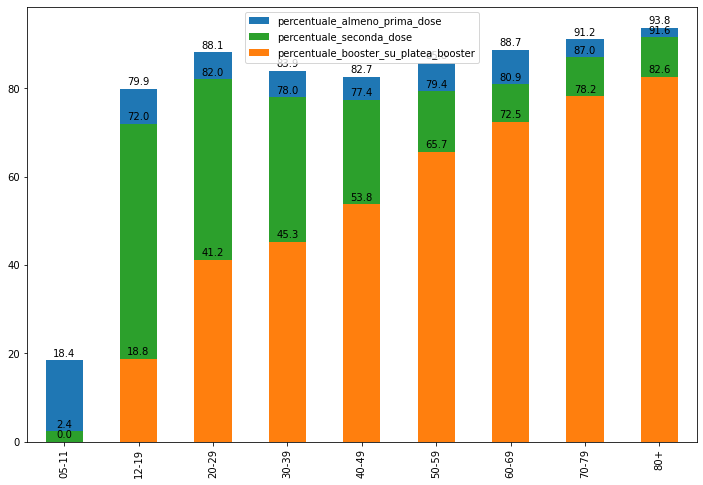

In [58]:
fig, ax = plt.subplots(figsize =(12, 8))  #figsize =(5, 5)
df_fasce.plot(kind = 'bar', y = 'percentuale_almeno_prima_dose', ax = ax, color="tab:blue")
df_fasce.plot(kind = 'bar', y = 'percentuale_seconda_dose', ax = ax, color="tab:green")
df_fasce.plot(kind = 'bar', y = 'percentuale_booster_su_platea_booster', ax = ax, color="tab:orange")
add_value_labels(ax)


### Percentuali somministrazione per face di età ad oggi

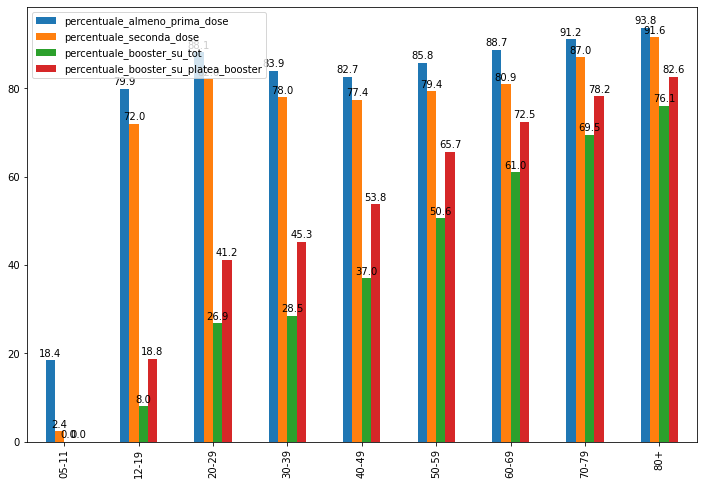

In [59]:
fig, ax = plt.subplots(figsize =(12, 8))  #figsize =(5, 5)
df_fasce.plot(kind = 'bar', y = ['percentuale_almeno_prima_dose','percentuale_seconda_dose',\
                                 'percentuale_booster_su_tot', 'percentuale_booster_su_platea_booster'], ax = ax,\
             legend='top_right')#, color="tab:blue")
#df_fasce.plot(kind = 'bar', y = 'percentuale_seconda_dose', ax = ax, color="tab:green")
#df_fasce.plot(kind = 'bar', y = 'percentuale_booster', ax = ax, color="tab:orange")
add_value_labels(ax)


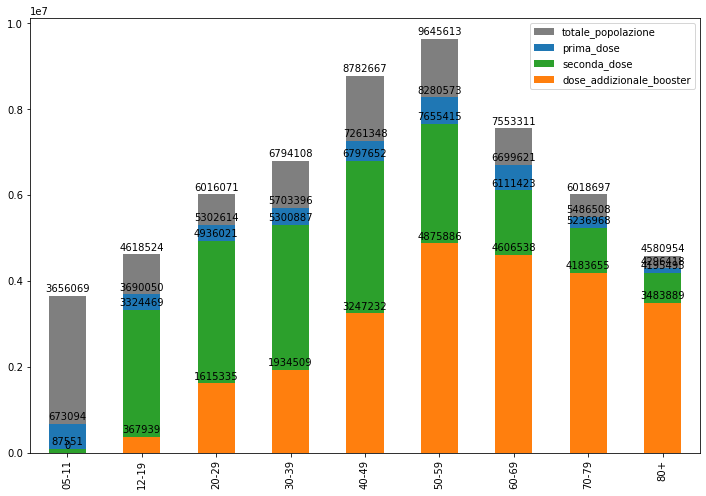

In [60]:
fig, ax = plt.subplots(figsize =(12, 8)) 
df_fasce.plot(kind = 'bar', y = 'totale_popolazione', ax = ax, color = "tab:grey")
df_fasce.plot(kind = 'bar', y = 'prima_dose', ax = ax, color="tab:blue")
df_fasce.plot(kind = 'bar', y = 'seconda_dose', ax = ax, color="tab:green" )
df_fasce.plot(kind = 'bar', y = 'dose_addizionale_booster', ax = ax, color="tab:orange")
add_value_labels(ax, spacing=2, n_decimals = 0 )


## Percentuale vaccinati sul totale

In [61]:
df_fasce_trans = df_fasce.transpose()
df_fasce_trans

,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
totale,761776,7503867,12066077,13151206,17594931,21153188,17650230,15065829,12072355
sesso_maschile,393036,3855656,6239764,6685138,8691365,10363650,8583678,7106569,4756489
sesso_femminile,368740,3648211,5826313,6466068,8903566,10789538,9066552,7959260,7315866
prima_dose,673094,3690050,5302614,5703396,7261348,8280573,6699621,5486508,4296418
seconda_dose,87551,3324469,4936021,5300887,6797652,7655415,6111423,5236968,4195495
pregressa_infezione,1131,121409,212107,212414,288699,341314,232648,158698,96553
dose_addizionale_booster,0,367939,1615335,1934509,3247232,4875886,4606538,4183655,3483889
ultimo_aggiornamento,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12
totale_popolazione,3656069,4618524,6016071,6794108,8782667,9645613,7553311,6018697,4580954
totale_popolazione_booster,NaN,1955697.0,3923418.0,4271568.0,6039860.0,7425366.0,6354604.0,5352165.0,4216335.0


In [62]:
df_fasce_trans.loc[:, 'tot_all']  = df_fasce_trans.sum(axis=1)
df_fasce_trans.loc[:, 'tot_>12'] = df_fasce_trans.drop(columns = ['05-11', 'tot_all']).sum(axis=1)
df_fasce_trans

,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,tot_all,tot_>12
totale,761776,7503867,12066077,13151206,17594931,21153188,17650230,15065829,12072355,117019459,116257683
sesso_maschile,393036,3855656,6239764,6685138,8691365,10363650,8583678,7106569,4756489,56675345,56282309
sesso_femminile,368740,3648211,5826313,6466068,8903566,10789538,9066552,7959260,7315866,60344114,59975374
prima_dose,673094,3690050,5302614,5703396,7261348,8280573,6699621,5486508,4296418,47393622,46720528
seconda_dose,87551,3324469,4936021,5300887,6797652,7655415,6111423,5236968,4195495,43645881,43558330
pregressa_infezione,1131,121409,212107,212414,288699,341314,232648,158698,96553,1664973,1663842
dose_addizionale_booster,0,367939,1615335,1934509,3247232,4875886,4606538,4183655,3483889,24314983,24314983
ultimo_aggiornamento,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-12,2022-01-122022-01-122022-01-122022-01-122022-0...,2022-01-122022-01-122022-01-122022-01-122022-0...
totale_popolazione,3656069,4618524,6016071,6794108,8782667,9645613,7553311,6018697,4580954,57666014,54009945
totale_popolazione_booster,NaN,1955697.0,3923418.0,4271568.0,6039860.0,7425366.0,6354604.0,5352165.0,4216335.0,39539013.0,39539013.0


In [63]:
# def percentuale_vaccinati(colonna, tipo_dose = 'prima_dose', totale = 'totale_popolazione'):
#     """Calcola la percentuale all'interno del dataframe df_fasce_trans.
#     Arguments:
#         colonna (str): Colonna di df_face_trans in cui si trova il valor di cui si vuole calcolare la percentuale.
#         tipo_dose (str): Tipo dose di cui calcolare perc (riga di df_fasce_trans).
#         totale (str): Totale popolazione di riferimento (riga di df_fasce_trans).
#     """
#     return round(df_fasce_trans.loc[tipo_dose, colonna]/ df_fasce_trans.loc[totale, colonna]*100, 2)

def percentuale_vaccinati(colonna, df_1 = df_fasce_trans, tipo_dose = 'prima_dose', totale = 'totale_popolazione'):
    """Calcola la percentuale all'interno del dataframe df_fasce_trans.
    Arguments:
        colonna (str): Colonna del dataframe in cui si trova il valor di cui si vuole calcolare la percentuale.
        df_1 (pandas.core.frame.DataFrame): dataframe contente i dati
        tipo_dose (str): Valore di cui si vuole calcolare la percentuale (riga del dataframe).
        totale (str): Totale di riferimento (riga del dataframe).
    """
    return round(df_1.loc[tipo_dose, colonna]/ df_1.loc[totale, colonna]*100, 2)

### Percentuale totale di vaccinati almeno con prima dose sul totale della platea vaccinabile

In [64]:
percentuale_vaccinati('tot_all')

82.19

In [65]:
#prentuale sulla "platea totale esclusa la fascia 05-11 anni":
percentuale_vaccinati('tot_>12')


86.5

### Percentuale totale di vaccinati almeno con seconda dose

In [66]:
percentuale_vaccinati('tot_all', tipo_dose='seconda_dose')

75.69

In [67]:
percentuale_vaccinati('tot_>12', tipo_dose='seconda_dose')

80.65

### Percentuale totale di vaccinati booster

In [68]:
percentuale_vaccinati('tot_all', tipo_dose='dose_addizionale_booster', totale = 'totale_popolazione_booster')

61.5

In [69]:
percentuale_vaccinati('tot_all', tipo_dose='dose_addizionale_booster', totale = 'totale_popolazione')

42.17

In [70]:
percentuale_vaccinati('tot_all', tipo_dose='dose_addizionale_booster', totale = 'seconda_dose')

55.71

## Andamento somministrazione vaccini booster

In [71]:

df_platea_booster_grouped

,totale_popolazione_booster
categoria_prevalente,
12-19,1955697
20-29,3923418
30-39,4271568
40-49,6039860
50-59,7425366
60-69,6354604
70-79,5352165
80+,4216335


In [72]:
df_platea_booster_grouped_tot = df_platea_booster_grouped.copy()
df_platea_booster_grouped_tot.loc['totale','totale_popolazione_booster'] = df_platea_booster_grouped['totale_popolazione_booster'].sum()
df_platea_booster_grouped_tot

,totale_popolazione_booster
categoria_prevalente,
12-19,1955697.0
20-29,3923418.0
30-39,4271568.0
40-49,6039860.0
50-59,7425366.0
60-69,6354604.0
70-79,5352165.0
80+,4216335.0
totale,39539013.0


In [73]:
df_pivot

,fascia_anagrafica,codice_regione_ISTAT,dose_addizionale_booster,pregressa_infezione,prima_dose,seconda_dose,sesso_femminile,sesso_maschile,totale_vaccini
data_somministrazione,,,,,,,,,
2020-12-27,20-29,214,0,0,704,0,446,258,704
2020-12-27,30-39,214,0,0,1088,0,598,490,1088
2020-12-27,40-49,214,0,2,1506,0,939,569,1508
2020-12-27,50-59,214,0,3,2204,0,1255,952,2207
2020-12-27,60-69,214,0,5,1508,0,412,1101,1513
...,...,...,...,...,...,...,...,...,...
2022-01-11,50-59,461,110465,174,8638,6648,62625,63300,125925
2022-01-11,60-69,462,89643,60,7196,4488,53644,47743,101387
2022-01-11,70-79,456,61783,27,4193,2398,38373,30028,68401


In [74]:
df_tot_booster_per_anagrafica = df_pivot.pivot(columns = 'fascia_anagrafica', values = 'dose_addizionale_booster')
df_tot_booster_per_anagrafica = df_tot_booster_per_anagrafica[df_tot_booster_per_anagrafica.index > '2021-09-12']
df_tot_booster_per_anagrafica.loc[:, 'totale'] = df_tot_booster_per_anagrafica.sum(axis=1)
df_tot_booster_per_anagrafica.loc[:, '80+'] = df_tot_booster_per_anagrafica['80-89'] + df_tot_booster_per_anagrafica['90+']
df_tot_booster_per_anagrafica.drop(columns=['80-89', '90+'], inplace = True)
df_tot_booster_per_anagrafica

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,totale,80+
data_somministrazione,,,,,,,,,,
2021-09-13,NaN,26.0,54.0,39.0,41.0,60.0,35.0,32.0,333.0,46.0
2021-09-14,NaN,46.0,49.0,53.0,57.0,61.0,51.0,44.0,419.0,58.0
2021-09-15,NaN,30.0,47.0,60.0,61.0,71.0,56.0,52.0,450.0,73.0
2021-09-16,NaN,33.0,60.0,82.0,113.0,172.0,130.0,99.0,778.0,89.0
2021-09-17,NaN,34.0,58.0,60.0,131.0,196.0,208.0,202.0,997.0,108.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-07,0.0,20903.0,68693.0,71521.0,100024.0,118735.0,89179.0,59570.0,548247.0,19622.0
2022-01-08,0.0,20324.0,60143.0,67293.0,94421.0,113258.0,75499.0,48932.0,496078.0,16208.0
2022-01-09,0.0,16180.0,40954.0,44666.0,61310.0,70778.0,44956.0,26918.0,314297.0,8535.0


In [75]:
#ricavo andamento cumulativo
df_tot_booster_per_anagrafica_cumsum = df_tot_booster_per_anagrafica.cumsum()
df_tot_booster_per_anagrafica_cumsum

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,totale,80+
data_somministrazione,,,,,,,,,,
2021-09-13,NaN,26.0,54.0,39.0,41.0,60.0,35.0,32.0,333.0,46.0
2021-09-14,NaN,72.0,103.0,92.0,98.0,121.0,86.0,76.0,752.0,104.0
2021-09-15,NaN,102.0,150.0,152.0,159.0,192.0,142.0,128.0,1202.0,177.0
2021-09-16,NaN,135.0,210.0,234.0,272.0,364.0,272.0,227.0,1980.0,266.0
2021-09-17,NaN,169.0,268.0,294.0,403.0,560.0,480.0,429.0,2977.0,374.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-07,0.0,271327.0,1380760.0,1680293.0,2901751.0,4473592.0,4309495.0,3988461.0,22427698.0,3422019.0
2022-01-08,0.0,291651.0,1440903.0,1747586.0,2996172.0,4586850.0,4384994.0,4037393.0,22923776.0,3438227.0
2022-01-09,0.0,307831.0,1481857.0,1792252.0,3057482.0,4657628.0,4429950.0,4064311.0,23238073.0,3446762.0


In [76]:
g = df_tot_booster_per_anagrafica_cumsum.drop(columns=['totale']).plot_bokeh(vertical_xlabel = True,\
                        title="Fasce anagrafiche", figsize=(950, 500), legend="top_left") #.resample(rule='W').mean()

In [77]:
#Ricavo percentuale per ogni fascia di età dell'andamento cumulativo
eta='12-19'
df_tot_booster_per_anagrafica_cumsum_perc =df_tot_booster_per_anagrafica_cumsum.loc[:,[eta]]/\
                df_platea_booster_grouped_tot.loc[eta, 'totale_popolazione_booster']*100

for eta in df_platea_booster_grouped_tot.index[1:]:
    df = df_tot_booster_per_anagrafica_cumsum.loc[:,[eta]]/\
                df_platea_booster_grouped_tot.loc[eta, 'totale_popolazione_booster']*100
    df_tot_booster_per_anagrafica_cumsum_perc =pd.concat([df_tot_booster_per_anagrafica_cumsum_perc, df], axis=1) 
    
#df_tot_booster_per_anagrafica_cumsum_perc = df_tot_booster_per_anagrafica_cumsum_perc.round(decimals=0)
df_tot_booster_per_anagrafica_cumsum_perc


fascia_anagrafica,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,totale
data_somministrazione,,,,,,,,,
2021-09-13,0.001329,0.001376,0.000913,0.000679,0.000808,0.000551,0.000598,0.001091,0.000842
2021-09-14,0.003682,0.002625,0.002154,0.001623,0.001630,0.001353,0.001420,0.002467,0.001902
2021-09-15,0.005216,0.003823,0.003558,0.002633,0.002586,0.002235,0.002392,0.004198,0.003040
2021-09-16,0.006903,0.005352,0.005478,0.004503,0.004902,0.004280,0.004241,0.006309,0.005008
2021-09-17,0.008641,0.006831,0.006883,0.006672,0.007542,0.007554,0.008015,0.008870,0.007529
...,...,...,...,...,...,...,...,...,...
2022-01-07,13.873673,35.192783,39.336679,48.043349,60.247428,67.816893,74.520516,81.160985,56.722959
2022-01-08,14.912893,36.725707,40.912049,49.606647,61.772713,69.004992,75.434763,81.545394,57.977613
2022-01-09,15.740219,37.769542,41.957707,50.621736,62.725905,69.712448,75.937700,81.747821,58.772517


### Andamento cumulativo percentuale (su popolazione booster) di somministrazione booster per fascia di età 

In [78]:
g = df_tot_booster_per_anagrafica_cumsum_perc.plot_bokeh(vertical_xlabel = True,\
                        title="Fasce anagrafiche", figsize=(950, 500), legend="top_left") #.resample(rule='W').mean()

In [79]:

g = df_tot_booster_per_anagrafica.plot_bokeh(y='totale',vertical_xlabel = True,\
                        title="Fasce anagrafiche", figsize=(950, 500), legend="top_left")

### Stima "a spanne" dei giorni neccessari a concludere l'inoculazione della dose booster a tutta la platea booster

In [80]:
#Media dosi booster giornarliere somministrate (media sull'ultima settimana):
media_dosi_giornaliera = int(df_tot_booster_per_anagrafica.tail(7).mean()['totale'])
media_dosi_giornaliera

466487

In [81]:
#Totale platea booster
tot_platea_booster = int(df_platea_booster_grouped_tot.loc['totale', 'totale_popolazione_booster'])
tot_platea_booster

39539013

In [82]:
#dosi booster finora somministrate
booster_somministrate = int(df_tot_booster_per_anagrafica_cumsum.loc[df_tot_booster_per_anagrafica_cumsum.index.max(), 'totale'])
booster_somministrate

24314983

In [83]:
#Percentuale platea booster finora vaccinata
booster_somministrate/tot_platea_booster*100

61.49618099976345

In [84]:
#Platea Booster a cui ancora non è stata inoculata la dose
platea_rimanente = tot_platea_booster - booster_somministrate
platea_rimanente

15224030

In [85]:
platea_rimanente/tot_platea_booster*100

38.50381900023655

#### Giorni necessari a concludere vaccinazioni platea booster

In [86]:
gg_tot = platea_rimanente//media_dosi_giornaliera
gg_tot

32

In [87]:
#Data stimata
print(df_tot_booster_per_anagrafica_cumsum_perc.index[-1] + timedelta(days=gg_tot))

2022-02-12 00:00:00


#### Giorni necessari per arrivare all'80% della platea booster vaccinata

In [88]:
gg_80 = (platea_rimanente*0.8)//media_dosi_giornaliera

In [89]:
#Data stimata
print(df_tot_booster_per_anagrafica_cumsum_perc.index[-1] + timedelta(days=gg_80))

2022-02-06 00:00:00
